## Week 6: K-means Clustering

**(1a) Load the data file 'kmc-data1.xlsx' and visualize the data.**

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
df1 = pd.read_csv('kmc_data1.csv')

In [4]:
df1.head()

,X,Y
0,-1.264053,1.527905
1,-0.970711,0.470560
2,-0.100697,0.303793
3,-1.725962,1.585095
4,0.134297,-1.106855


**(1b) Implement K-means clustering. **

**(1c) Let $K = 3$ and the initial cluster means be $[0,0], [4,4]$ and $[-4,4]$. Plot the final clusters with K-means clustering.**

In [5]:
array = ([0,0],[4,4],[-4,4])
array  = np.asarray(array)
kmeans = KMeans(n_clusters=3, init = array).fit(df1)

/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [6]:
kmeans.cluster_centers_


array([[ 0.06588589, -0.07250832],
       [ 3.83814758,  3.94217913],
       [-3.99090257,  4.03253516]])

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd 

style.use('ggplot')

class K_Means:
	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations
    
#     def euclideanDistance(instance1, instance2, length):
#         distance = 0
#         for x in range(length):
#             distance += pow((instance1[x] - instance2[x]), 2)
#         return math.sqrt(distance)

	def fit(self, data):

		self.centroids = {}

# 		initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
		for i in range(self.k):
			self.centroids[i] = array[i]

		#begin iterations
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			#find the distance between the point and cluster; choose the nearest centroid
			for features in data:
				distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#average the cluster datapoints to re-calculate the centroids
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = True

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

				if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
					isOptimal = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
			if isOptimal:
				break

	def pred(self, data):
		distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
		classification = distances.index(min(distances))
		return classification

# def main():
	
# df = pd.read_csv(r".\data\ipl.csv")
# df = df[['one', 'two']]
# dataset = df.astype(float).values.tolist()

X = df1.values #returns a numpy array

km = K_Means(3)
km.fit(X)

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)

# mpld3.show()

# if __name__ == "__main__":
# 	main()

/home/vishnu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide
/home/vishnu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [8]:
km.centroids

{0: array([ 0.06588589, -0.07250832]),
 1: array([3.83814758, 3.94217913]),
 2: array([-3.99090257,  4.03253516])}

**(1d) Compute the sum of square distance of each point from the cluster mean.**


In [9]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [10]:
def distances(cen, data):
    di = 0
    dis = 0
    dist = 0
    for i in range(len(cen)):
        for j in range(len(data)):
            dist = euclideanDistance(cen[i], data[i][j],2)
            dis = dis + dist
        di = di + dis
    return di
    


In [11]:
distances(km.centroids, km.classes)

24.284610347904966

**(1e) Repeat the above exercise for all $K = 2,3,4$. **

**(1f) Plot the final clusters (for $K = 2,3,4$) and report the sum of square distance of each point from the cluster mean. Comment.**

In [12]:
class K_Means:
	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations
    
#     def euclideanDistance(instance1, instance2, length):
#         distance = 0
#         for x in range(length):
#             distance += pow((instance1[x] - instance2[x]), 2)
#         return math.sqrt(distance)

	def fit(self, data):

		self.centroids = {}

# 		initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
		for i in range(self.k):
			self.centroids[i] = data[i]

		#begin iterations
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			#find the distance between the point and cluster; choose the nearest centroid
			for features in data:
				distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#average the cluster datapoints to re-calculate the centroids
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = True

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

				if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
					isOptimal = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
			if isOptimal:
				break

	def pred(self, data):
		distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
		classification = distances.index(min(distances))
		return classification


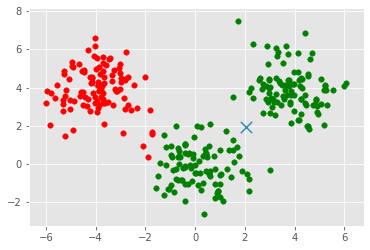

In [13]:
km_2 = K_Means(2)
km_2.fit(X)

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]

for centroid in km_2.centroids:
    plt.scatter(km_2.centroids[centroid][0], km_2.centroids[centroid][1], s = 130, marker = "x")

for classification in km_2.classes:
    color = colors[classification]
    for features in km_2.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)


In [14]:
distances(km_2.centroids, km_2.classes)

20.085749116271177

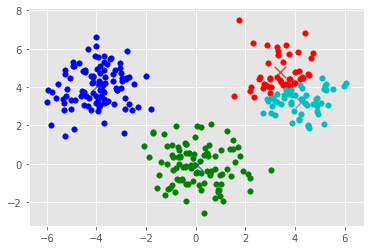

In [15]:
km_2 = K_Means(4)
km_2.fit(X)

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]

for centroid in km_2.centroids:
    plt.scatter(km_2.centroids[centroid][0], km_2.centroids[centroid][1], s = 130, marker = "x")

for classification in km_2.classes:
    color = colors[classification]
    for features in km_2.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)


In [16]:
distances(km_2.centroids, km_2.classes)

39.75340970394428

**(2a) Load the data from the file 'kmc-data2.xlsx' and visualize the data. **

In [17]:
df2 = pd.read_csv('kmc_data2.csv')
df2['Z'] = 0
df2.head()

,X,Y,Z
0,0.283953,-0.630628,0
1,-0.198031,0.618049,0
2,0.311375,0.610005,0
3,0.086885,0.533743,0
4,0.313070,0.369392,0


**(2b) Cluster the data with K-means clustering. Consider $K = 2$. **

In [18]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df2)
kmeans.cluster_centers_

array([[ 0.22935356,  0.56935461,  0.        ],
       [-0.26196879, -0.59641419,  0.        ]])

In [19]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df2, 2)
kmeans = pd.DataFrame(clust_labels)
df2.insert((df2.shape[1]),'kmeans',kmeans)


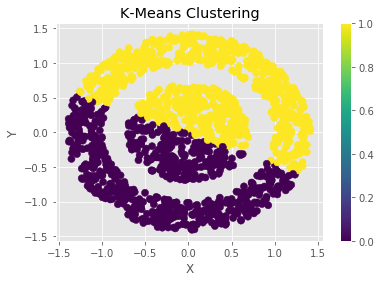

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df2['X'],df2['Y'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(scatter)

**(2c) Suppose you want to cluster the data into two rings. Now, transform the data such that K-means clustering identifies the two rings as clusters. **

In [21]:
import pandas as pd
data3 = pd.DataFrame()
data3['Column1'] = (df2['X'].pow(2) + df2['Y'].pow(2)).pow(1/2)
data3['Column2'] = 0

In [22]:
clust_labels, cent = doKmeans(data3, 2)
kmeans = pd.DataFrame(clust_labels)
data3.insert((data3.shape[1]),'kmeans',kmeans)
       
# df = pd.DataFrame({'Cluster': C})
# data_mod = data2.join(df)
# fig= plt.figure(figsize=(12,6))
# ax = plt.gca()

# sns.palplot(sns.color_palette("Set2", 8))

# color_labels = data_mod['Cluster'].unique()

# rgb_values = sns.color_palette("Set2", 8)

# color_map = dict(zip(color_labels, rgb_values))

# ax.scatter(data_mod['Column1'], data_mod['Column2'], c=data_mod['Cluster'].map(color_map))

In [32]:
df = pd.DataFrame({'Cluster': clust_labels})
data_mod = df2.join(df)
import seaborn as sns

In [34]:
data_mod.head()

,X,Y,Z,kmeans,Cluster
0,0.283953,-0.630628,0,0,1
1,-0.198031,0.618049,0,1,1
2,0.311375,0.610005,0,1,1
3,0.086885,0.533743,0,1,1
4,0.313070,0.369392,0,1,1


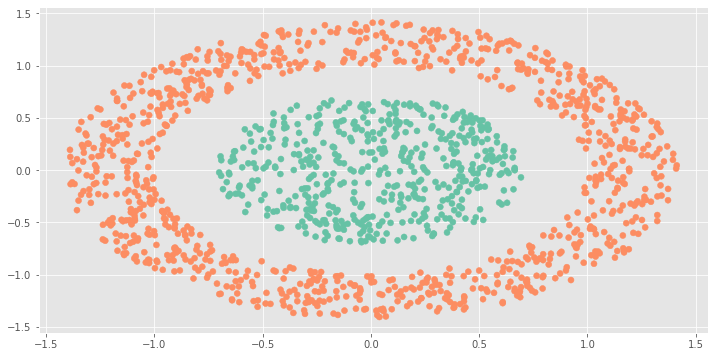

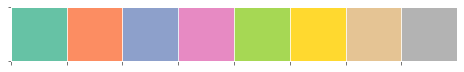

In [35]:
fig= plt.figure(figsize=(12,6))
ax = plt.gca()

sns.palplot(sns.color_palette("Set2", 8))

color_labels = data_mod['Cluster'].unique()

rgb_values = sns.color_palette("Set2", 8)

color_map = dict(zip(color_labels, rgb_values))

ax.scatter(data_mod['X'], data_mod['Y'], c=data_mod['Cluster'].map(color_map))

**(3a) (Optional) Consider the data in 'kmc-data1.xlsx'. Now, approximate the distribution of the data with a mixture of Gaussians, one per cluster. Report the distribution. **

**(3b) (Optional) Sample points from the mixture distribution and see if the points lie in the same cluster (distribution) from which it was generated. **